

# **A CONTINUACIÓN SE PRESENTA EL CONSOLIDADO DE LAS ACTIVIDADES**

## Actividad 2 - Búsqueda y sistemas basados en reglas

Conforme a la actividad, se realizará un **Sistema Experto para transporte masivo**

El proyecto consistirá en desarrollar un sistema que determine la mejor ruta en un sistema de transporte masivo local utilizando datos cargados desde un archivo CSV

**1. Crear y Preparar el Archivo**

El archivo CSV contiene los siguientes datos con las siguientes columnas:
- Ciudad_Origen: Nombre de la estación de inicio.
- Ciudad_Destino: Nombre de la estación de destino.
- Distancia_km: Distancia entre las estaciones (en kilómetros).
- Tiempo_min: Tiempo estimado para viajar entre las estaciones (en minutos).
- Costo_COP: Costo del viaje en pesos colombianos.
- Transbordos: Número de transbordos requeridos.
- Disponible: Indica si la ruta está disponible

**2. Cargar los Datos desde el Archivo**

Utilizaremos pandas para cargar el archivo rutas.csv en un DataFrame y trabajar con los datos dinámicamente.

In [17]:
import pandas as pd

raw_url = 'https://raw.githubusercontent.com/feliperamon1/Personal/main/rutas.csv'

# Cargar el archivo CSV usando el raw URL
rutas_df = pd.read_csv(raw_url)

# Mostrar los datos cargados
print("Datos de rutas cargados desde el archivo CSV:")
print(rutas_df)

Datos de rutas cargados desde el archivo CSV:
  Ciudad_Origen Ciudad_Destino  Distancia_km  Tiempo_min  Costo_COP  \
0    Estación A     Estación B             5          10       2000   
1    Estación A     Estación C            10          25       3000   
2    Estación B     Estación C             7          15       1500   
3    Estación B     Estación D            12          30       2500   
4    Estación C     Estación D             8          20       2000   
5    Estación C     Estación E            15          40       3500   
6    Estación D     Estación E            20          50       4000   

   Transbordos  Disponible  
0            0        True  
1            1        True  
2            0        True  
3            1        True  
4            1       False  
5            2        True  
6            2        True  


**3. Definir el Sistema Experto**

Usamos el framework Experta para implementar la lógica del sistema experto.

a. Definimos los hechos:
- Ruta: Representa cada posible conexión entre dos estaciones.
- Preferencias: Representa las preferencias del usuario (tiempo, costo, transbordos).

b. Definimos las reglas:
- Recomendaciones basadas en tiempo, costo, transbordos y disponibilidad.

In [18]:
pip install experta


  Using cached frozendict-1.2-py3-none-any.whl
  Attempting uninstall: frozendict
    Found existing installation: frozendict 2.4.6
    Uninstalling frozendict-2.4.6:
      Successfully uninstalled frozendict-2.4.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.50 requires frozendict>=2.3.4, but you have frozendict 1.2 which is incompatible.


In [19]:
!python3 -m venv mi_entorno
!source mi_entorno/bin/activate
!pip install experta==1.9.4

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/mi_entorno/bin/python3

/bin/bash: line 1: mi_entorno/bin/activate: No such file or directory


In [20]:
!pip install --upgrade frozendict

  Using cached frozendict-2.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (23 kB)
Using cached frozendict-2.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (117 kB)
  Attempting uninstall: frozendict
    Found existing installation: frozendict 1.2
    Uninstalling frozendict-1.2:
      Successfully uninstalled frozendict-1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
experta 1.9.4 requires frozendict==1.2, but you have frozendict 2.4.6 which is incompatible.


In [21]:
from experta import *

class Ruta(Fact):
    """
    Representa una ruta entre dos estaciones en el sistema de transporte masivo.
    """
    pass

class Preferencias(Fact):
    """
    Representa las preferencias del usuario para seleccionar la mejor ruta.
    """
    pass

class SistemaTransporteMasivo(KnowledgeEngine):
    """
    Sistema experto que evalúa y recomienda rutas en el sistema de transporte masivo.
    """

    @Rule(
        Ruta(origen=MATCH.origen, destino=MATCH.destino, tiempo=P(lambda x: x <= 20)),
        Preferencias(prioridad='tiempo')
    )
    def ruta_rapida(self, origen, destino):
        print(f"Recomendación: Use la ruta más rápida de {origen} a {destino} (<= 20 minutos).")

    @Rule(
        Ruta(origen=MATCH.origen, destino=MATCH.destino, costo=P(lambda x: x <= 3000)),
        Preferencias(prioridad='costo')
    )
    def ruta_economica(self, origen, destino):
        print(f"Recomendación: Use la ruta más económica de {origen} a {destino} (<= 3000 COP).")

    @Rule(
        Ruta(origen=MATCH.origen, destino=MATCH.destino, transbordos=P(lambda x: x <= 1)),
        Preferencias(prioridad='comodidad')
    )
    def ruta_con_menos_transbordos(self, origen, destino):
        print(f"Recomendación: Use la ruta con menos transbordos de {origen} a {destino} (<= 1 transbordo).")

    @Rule(
        Ruta(origen=MATCH.origen, destino=MATCH.destino, disponible=False)
    )
    def ruta_no_disponible(self, origen, destino):
        print(f"Advertencia: La ruta de {origen} a {destino} no está disponible actualmente.")


**4. Configurar y Ejecutar el Sistema**

a. Cargar datos y crear el motor:
- Declaramos cada ruta como un hecho.
- Declaramos las preferencias del usuario.

b. Ejecutar reglas:
- Evaluamos cada ruta según las preferencias dadas.

In [22]:
# Crear el motor
motor = SistemaTransporteMasivo()

# Evaluar rutas cargadas desde el archivo CSV
for _, ruta in rutas_df.iterrows():
    motor.reset()
    motor.declare(Ruta(
        origen=ruta['Ciudad_Origen'],
        destino=ruta['Ciudad_Destino'],
        tiempo=ruta['Tiempo_min'],
        costo=ruta['Costo_COP'],
        transbordos=ruta['Transbordos'],
        disponible=ruta['Disponible']
    ))
    motor.declare(Preferencias(prioridad='tiempo'))  # Cambia 'tiempo' a 'costo' o 'comodidad' según el caso
    motor.run()


Recomendación: Use la ruta más rápida de Estación A a Estación B (<= 20 minutos).
Recomendación: Use la ruta más rápida de Estación B a Estación C (<= 20 minutos).
Recomendación: Use la ruta más rápida de Estación C a Estación D (<= 20 minutos).
Advertencia: La ruta de Estación C a Estación D no está disponible actualmente.


**5. Visualización Gráfica**

Utilizamos NetworkX para representar las rutas gráficamente.

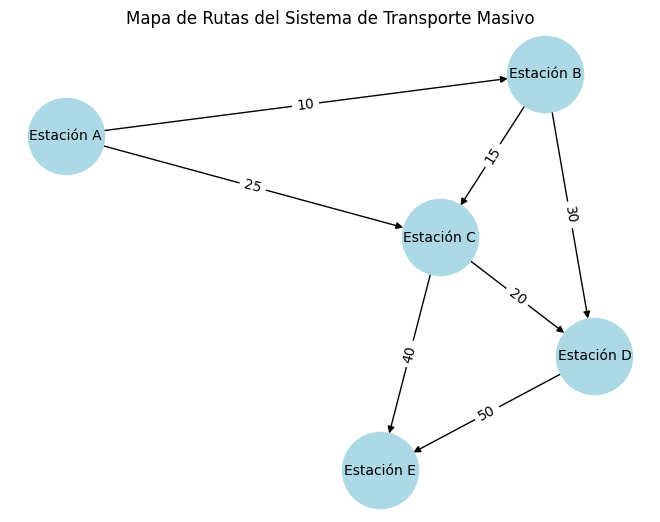

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def graficar_rutas(rutas_df):
    G = nx.DiGraph()
    for _, row in rutas_df.iterrows():
        G.add_edge(row['Ciudad_Origen'], row['Ciudad_Destino'], weight=row['Tiempo_min'])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Mapa de Rutas del Sistema de Transporte Masivo")
    plt.show()

# Visualizar rutas
graficar_rutas(rutas_df)


**6. Implementación de un Algoritmo de Optimización (Dijkstra)**

Usaremos NetworkX para encontrar la ruta más corta basándonos en tiempo o costo.

In [24]:
import networkx as nx

def construir_grafo(rutas_df, criterio='Tiempo_min'):
    """
    Construye un grafo dirigido a partir de las rutas y elige un criterio como peso.
    """
    G = nx.DiGraph()
    for _, row in rutas_df.iterrows():
        if row['Disponible']:  # Solo incluir rutas disponibles
            G.add_edge(row['Ciudad_Origen'], row['Ciudad_Destino'], weight=row[criterio])
    return G

def encontrar_mejor_ruta(origen, destino, grafo):
    """
    Encuentra la mejor ruta entre origen y destino usando el grafo.
    """
    try:
        ruta = nx.shortest_path(grafo, source=origen, target=destino, weight='weight')
        costo = nx.shortest_path_length(grafo, source=origen, target=destino, weight='weight')
        return ruta, costo
    except nx.NetworkXNoPath:
        return None, None

# Construir el grafo
grafo = construir_grafo(rutas_df, criterio='Tiempo_min')

# Encontrar la mejor ruta
origen, destino = "Estación A", "Estación E"
ruta, costo = encontrar_mejor_ruta(origen, destino, grafo)
if ruta:
    print(f"Mejor ruta basada en tiempo: {' -> '.join(ruta)} con un costo de {costo} minutos")
else:
    print(f"No se encontró una ruta entre {origen} y {destino}.")


Mejor ruta basada en tiempo: Estación A -> Estación C -> Estación E con un costo de 65 minutos


**7. Visualización del Algoritmo Dijkstra**

Usaremos NetworkX y Matplotlib para dibujar el grafo con la ruta más corta resaltada.

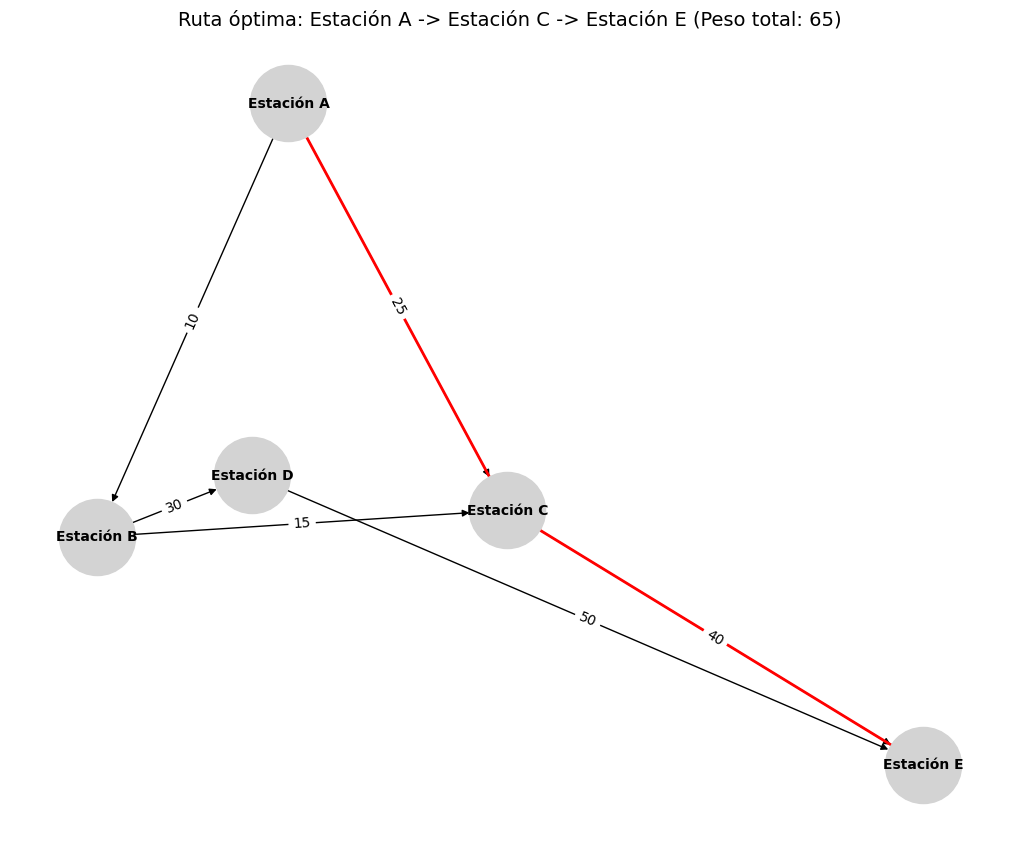

In [25]:
import matplotlib.pyplot as plt

# Construcción del Grafo
def construir_grafo(rutas_df, criterio='Tiempo_min'):
    """
    Construye un grafo dirigido a partir de las rutas y elige un criterio como peso.
    """
    G = nx.DiGraph()
    for _, row in rutas_df.iterrows():
        if row['Disponible']:  # Solo incluir rutas disponibles
            G.add_edge(row['Ciudad_Origen'], row['Ciudad_Destino'], weight=row[criterio])
    return G

# Visualización del Grafo y Resaltado de la Ruta Óptima
def visualizar_ruta_dijkstra(origen, destino, grafo):
    """
    Visualiza el grafo completo y resalta la ruta más corta calculada con Dijkstra.
    """
    try:
        # Ruta más corta basada en Dijkstra
        ruta_optima = nx.shortest_path(grafo, source=origen, target=destino, weight='weight')
        peso_total = nx.shortest_path_length(grafo, source=origen, target=destino, weight='weight')

        # Configuración del grafo para la visualización
        pos = nx.spring_layout(grafo)
        plt.figure(figsize=(10, 8))

        # Dibujar el grafo completo
        nx.draw(grafo, pos, with_labels=True, node_size=3000, node_color="lightgray", font_size=10, font_weight="bold")

        # Resaltar la ruta óptima
        edges_optima = list(zip(ruta_optima[:-1], ruta_optima[1:]))
        nx.draw_networkx_edges(grafo, pos, edgelist=edges_optima, edge_color='red', width=2)

        # Añadir etiquetas de peso
        edge_labels = nx.get_edge_attributes(grafo, 'weight')
        nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels)

        # Mostrar resultados
        plt.title(f"Ruta óptima: {' -> '.join(ruta_optima)} (Peso total: {peso_total})", fontsize=14)
        plt.show()

    except nx.NetworkXNoPath:
        print(f"No se encontró una ruta entre {origen} y {destino}.")

# Crear datos simulados de rutas
import pandas as pd

rutas_df = pd.DataFrame({
    'Ciudad_Origen': ['Estación A', 'Estación A', 'Estación B', 'Estación B', 'Estación C', 'Estación C', 'Estación D'],
    'Ciudad_Destino': ['Estación B', 'Estación C', 'Estación C', 'Estación D', 'Estación D', 'Estación E', 'Estación E'],
    'Distancia_km': [5, 10, 7, 12, 8, 15, 20],
    'Tiempo_min': [10, 25, 15, 30, 20, 40, 50],
    'Costo_COP': [2000, 3000, 1500, 2500, 2000, 3500, 4000],
    'Transbordos': [0, 1, 0, 1, 1, 2, 2],
    'Disponible': [True, True, True, True, False, True, True]
})

# Construir el grafo
grafo = construir_grafo(rutas_df, criterio='Tiempo_min')

# Visualizar la ruta óptima entre dos estaciones
visualizar_ruta_dijkstra("Estación A", "Estación E", grafo)


**8. Interfaz Interactiva**

Desarrollaremos una interfaz gráfica para que el usuario pueda seleccionar su origen, destino y preferencia de criterio (tiempo o costo).

In [26]:
import ipywidgets as widgets
from IPython.display import display
import networkx as nx
import pandas as pd

# Crear datos simulados de rutas
rutas_df = pd.DataFrame({
    'Ciudad_Origen': ['Estación A', 'Estación A', 'Estación B', 'Estación B', 'Estación C', 'Estación C', 'Estación D'],
    'Ciudad_Destino': ['Estación B', 'Estación C', 'Estación C', 'Estación D', 'Estación D', 'Estación E', 'Estación E'],
    'Tiempo_min': [10, 25, 15, 30, 20, 40, 50],
    'Costo_COP': [2000, 3000, 1500, 2500, 2000, 3500, 4000],
    'Disponible': [True, True, True, True, False, True, True]
})

# Construcción del grafo
def construir_grafo(rutas_df, criterio='Tiempo_min'):
    """
    Construye un grafo dirigido a partir de las rutas y elige un criterio como peso.
    """
    G = nx.DiGraph()
    for _, row in rutas_df.iterrows():
        if row['Disponible']:
            G.add_edge(row['Ciudad_Origen'], row['Ciudad_Destino'], weight=row[criterio])
    return G

grafo = construir_grafo(rutas_df)

# Listas desplegables con opciones dinámicas
origen = widgets.Dropdown(options=rutas_df['Ciudad_Origen'].unique(), description="Origen:")
destino = widgets.Dropdown(options=rutas_df['Ciudad_Destino'].unique(), description="Destino:")
criterio = widgets.Dropdown(options=["Tiempo_min", "Costo_COP"], description="Criterio:")
boton = widgets.Button(description="Buscar Ruta")

# Resultado
resultado = widgets.Output()

# Acción del botón
def buscar_ruta(b):
    with resultado:
        resultado.clear_output()
        try:
            ruta_optima = nx.shortest_path(grafo, source=origen.value, target=destino.value, weight='weight')
            peso_total = nx.shortest_path_length(grafo, source=origen.value, target=destino.value, weight='weight')
            print(f"Mejor ruta: {' -> '.join(ruta_optima)}")
            print(f"Peso total ({criterio.value}): {peso_total}")
        except nx.NetworkXNoPath:
            print("No se encontró una ruta válida entre las estaciones seleccionadas.")

boton.on_click(buscar_ruta)

# Mostrar widgets
display(origen, destino, criterio, boton, resultado)


Dropdown(description='Origen:', options=('Estación A', 'Estación B', 'Estación C', 'Estación D'), value='Estac…

Dropdown(description='Destino:', options=('Estación B', 'Estación C', 'Estación D', 'Estación E'), value='Esta…

Dropdown(description='Criterio:', options=('Tiempo_min', 'Costo_COP'), value='Tiempo_min')

Button(description='Buscar Ruta', style=ButtonStyle())

Output()

**Modelo de aprendizaje automático**

Análisis y preprocesamiento de datos

In [27]:


from sklearn.preprocessing import LabelEncoder, StandardScaler

raw_url = 'https://raw.githubusercontent.com/feliperamon1/Personal/main/rutas.csv'

# Cargar el archivo CSV usando el raw URL
rutas_df = pd.read_csv(raw_url)

# Codificar variables categóricas
label_encoder = LabelEncoder()
rutas_df['Ciudad_Origen'] = label_encoder.fit_transform(rutas_df['Ciudad_Origen'])
rutas_df['Ciudad_Destino'] = label_encoder.fit_transform(rutas_df['Ciudad_Destino'])

# Escalar valores numéricos
scaler = StandardScaler()
rutas_df[['Distancia_km', 'Tiempo_min', 'Costo_COP']] = scaler.fit_transform(
    rutas_df[['Distancia_km', 'Tiempo_min', 'Costo_COP']]
)

# Eliminar columnas no relevantes (si aplica)
rutas_df = rutas_df.drop(columns=['Disponible'])
print(rutas_df.head())


   Ciudad_Origen  Ciudad_Destino  Distancia_km  Tiempo_min  Costo_COP  \
0              0               0     -1.254990   -1.313222  -0.771744   
1              0               1     -0.209165   -0.164153   0.428746   
2              1               1     -0.836660   -0.930199  -1.371989   
3              1               2      0.209165    0.218870  -0.171499   
4              2               2     -0.627495   -0.547176  -0.771744   

   Transbordos  
0            0  
1            1  
2            0  
3            1  
4            1  


Dividir los datos en conjuntos de entrenamiento y prueba

In [28]:
#Separamos los datos en conjuntos para entrenamiento y evaluación del modelo.

from sklearn.model_selection import train_test_split

# Variables independientes y dependiente
X = rutas_df.drop(columns=['Transbordos'])  # Características
y = rutas_df['Transbordos']  # Variable objetivo

# División en conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenar un modelo de aprendizaje automático

In [29]:
#Utilizamos un modelo de regresión para predecir la variable objetivo Transbordos.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Entrenar el modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.11449999999999999


Realizar predicciones

In [30]:
#Predecimos la cantidad de transbordos para nuevas rutas o datos no vistos.

# Predicción de nuevos datos (simulación)
new_data = pd.DataFrame({
    'Ciudad_Origen': [0],
    'Ciudad_Destino': [3],
    'Distancia_km': [1.2],
    'Tiempo_min': [0.8],
    'Costo_COP': [0.5]
})
transbordos_pred = model.predict(new_data)
print(f"Transbordos predichos: {transbordos_pred}")


Transbordos predichos: [1.7]


Visualización de los resultados

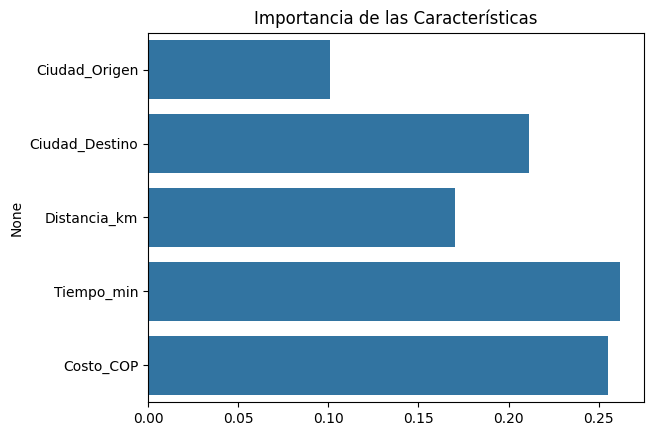

In [31]:
#Podemos crear gráficos para evaluar la precisión del modelo y la importancia de las características.

import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de características
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Importancia de las Características')
plt.show()


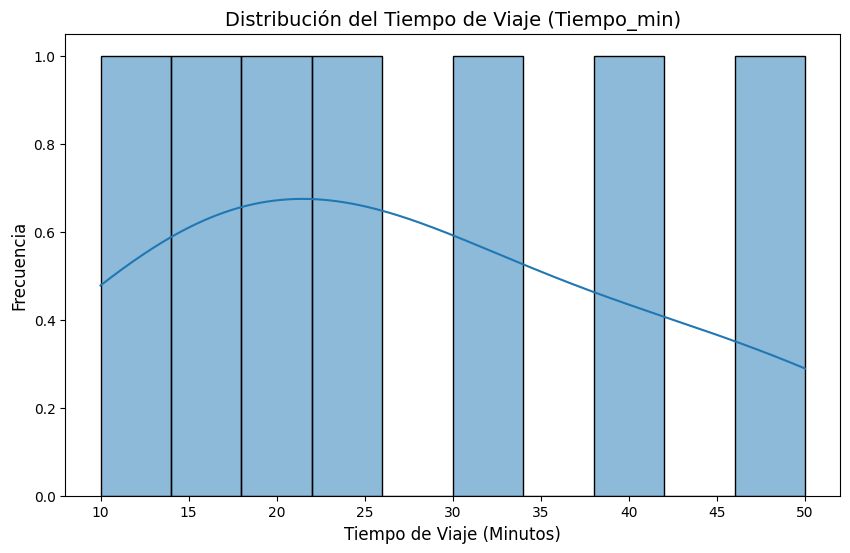

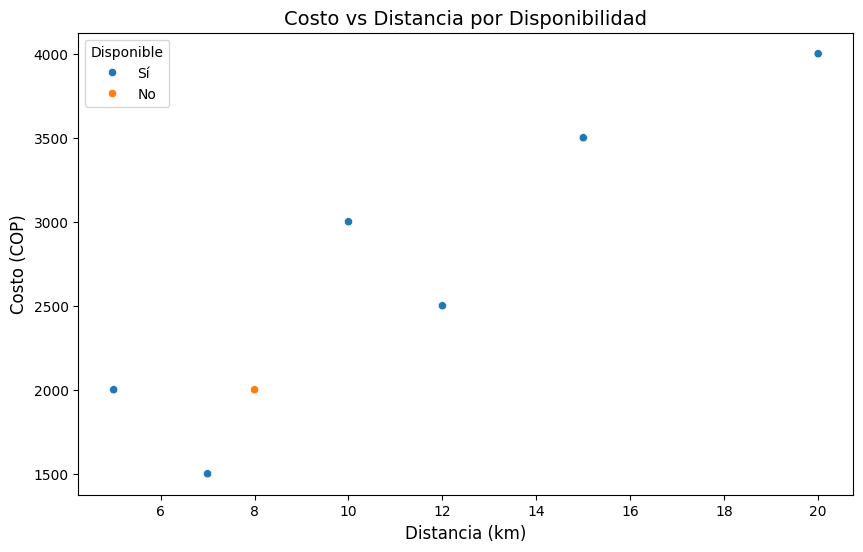

<ipython-input-1-d8886383383f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cost_per_transbordos, x='Transbordos', y='Costo_COP', palette='viridis')


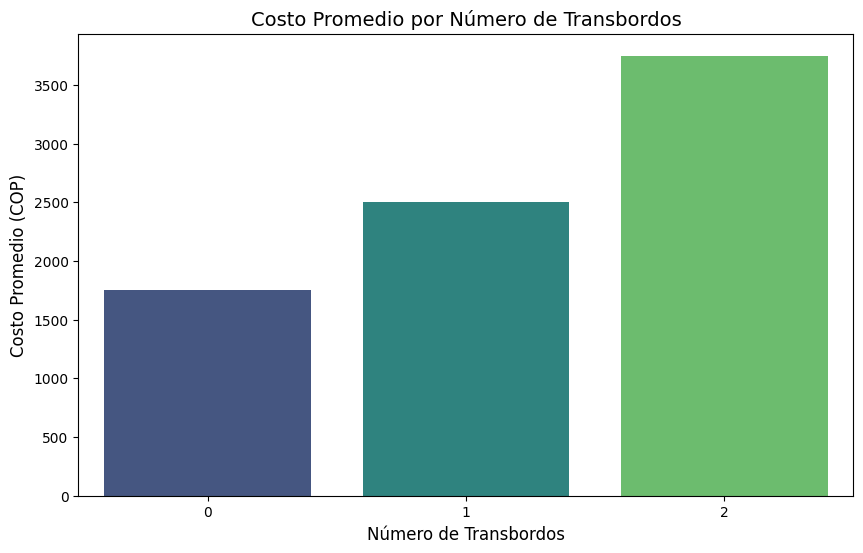

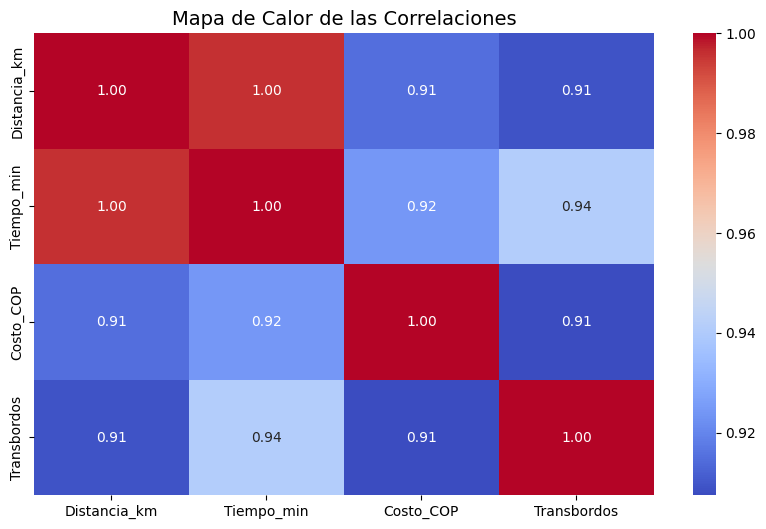

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir datos categóricos para facilitar las visualizaciones
raw_url = 'https://raw.githubusercontent.com/feliperamon1/Personal/main/rutas.csv'

# Cargar el archivo CSV usando el raw URL
rutas_df = pd.read_csv(raw_url)
rutas_df['Disponible'] = rutas_df['Disponible'].map({True: 'Sí', False: 'No'})

# Gráfico 1: Distribución del Tiempo de Viaje (Tiempo_min)
plt.figure(figsize=(10, 6))
sns.histplot(rutas_df['Tiempo_min'], bins=10, kde=True)
plt.title('Distribución del Tiempo de Viaje (Tiempo_min)', fontsize=14)
plt.xlabel('Tiempo de Viaje (Minutos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()
# Explicación: Este histograma muestra cómo están distribuidos los tiempos de viaje en todas las rutas.
# La línea KDE resalta las áreas con mayor concentración de tiempos. Por ejemplo, se puede identificar si hay tiempos dominantes.

# Gráfico 2: Costo vs Distancia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rutas_df, x='Distancia_km', y='Costo_COP', hue='Disponible')
plt.title('Costo vs Distancia por Disponibilidad', fontsize=14)
plt.xlabel('Distancia (km)', fontsize=12)
plt.ylabel('Costo (COP)', fontsize=12)
plt.legend(title='Disponible')
plt.show()
# Explicación: Este gráfico de dispersión analiza la relación entre el costo y la distancia de las rutas.
# Las rutas están coloreadas según su disponibilidad, permitiendo observar patrones como si las rutas largas son más costosas y si las rutas no disponibles tienen características únicas.

# Gráfico 3: Costo Promedio por Número de Transbordos
avg_cost_per_transbordos = rutas_df.groupby('Transbordos')['Costo_COP'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_cost_per_transbordos, x='Transbordos', y='Costo_COP', palette='viridis')
plt.title('Costo Promedio por Número de Transbordos', fontsize=14)
plt.xlabel('Número de Transbordos', fontsize=12)
plt.ylabel('Costo Promedio (COP)', fontsize=12)
plt.show()
# Explicación: Este gráfico de barras muestra cómo varía el costo promedio de las rutas en función del número de transbordos.
# Ayuda a determinar si un mayor número de transbordos incrementa significativamente los costos.

# Gráfico 4: Mapa de Calor de Correlaciones
plt.figure(figsize=(10, 6))
correlation_matrix = rutas_df[['Distancia_km', 'Tiempo_min', 'Costo_COP', 'Transbordos']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de las Correlaciones', fontsize=14)
plt.show()
# Explicación: Este mapa de calor muestra la relación entre las variables numéricas principales.
# Por ejemplo, una alta correlación entre "Distancia_km" y "Tiempo_min" es esperada, ya que mayores distancias implican mayor tiempo.


## **`Actividad 4 - Métodos de aprendizaje no supervisado`**

Análisis no supervisado para clustering de rutas y detección de patrones de uso horario

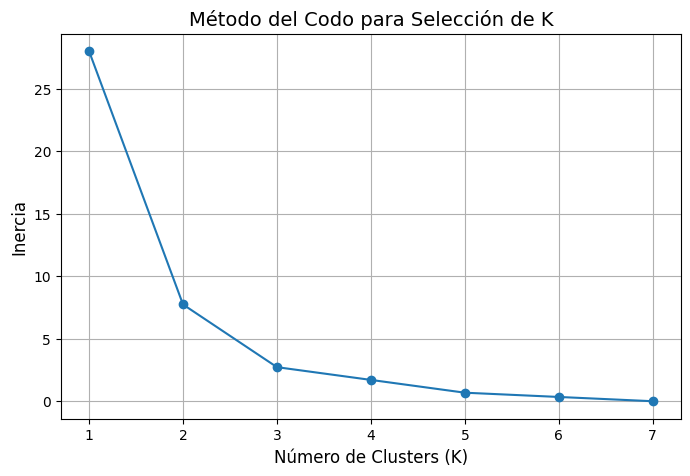

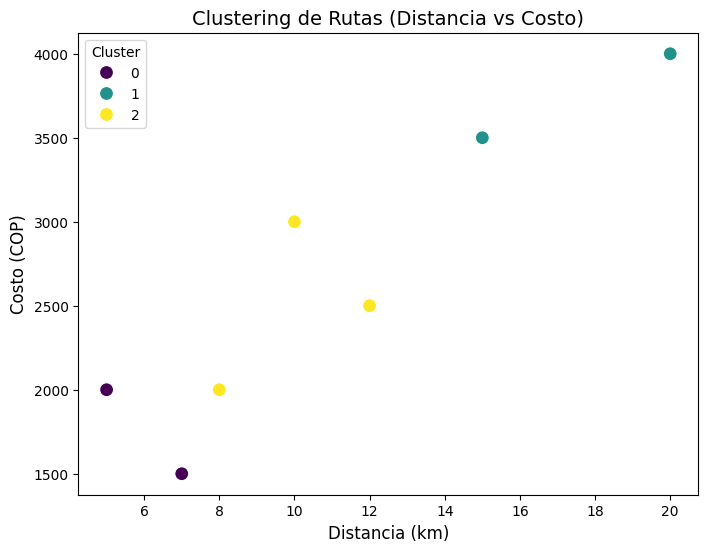

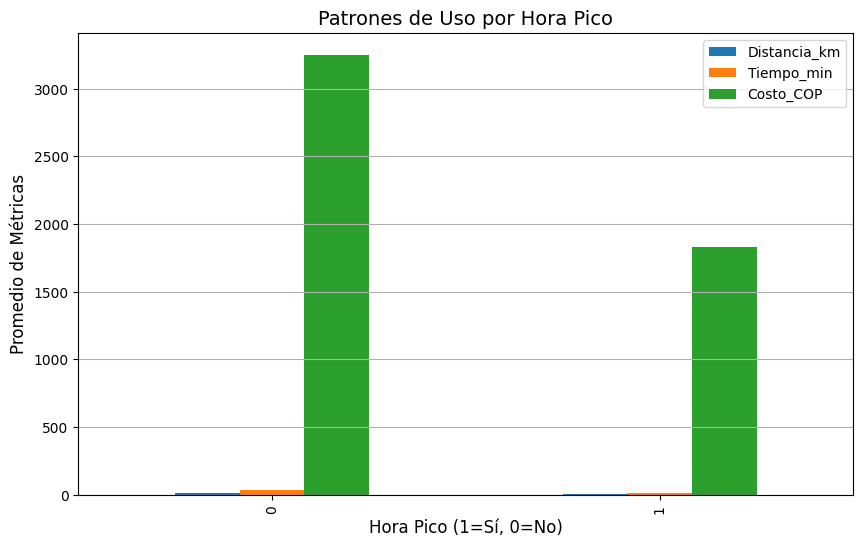

   Distancia_km  Tiempo_min  Costo_COP  Transbordos  Disponible  Cluster  \
0             5          10       2000            0           1        0   
1            10          25       3000            1           1        2   
2             7          15       1500            0           1        0   
3            12          30       2500            1           1        2   
4             8          20       2000            1           0        2   
5            15          40       3500            2           1        1   
6            20          50       4000            2           1        1   

   Hora_Pico  
0          1  
1          0  
2          1  
3          0  
4          1  
5          0  
6          0  


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Simular datos de rutas para el análisis
data = {
    'Distancia_km': [5, 10, 7, 12, 8, 15, 20],
    'Tiempo_min': [10, 25, 15, 30, 20, 40, 50],
    'Costo_COP': [2000, 3000, 1500, 2500, 2000, 3500, 4000],
    'Transbordos': [0, 1, 0, 1, 1, 2, 2],
    'Disponible': [1, 1, 1, 1, 0, 1, 1]  # 1=Disponible, 0=No Disponible
}
rutas_df = pd.DataFrame(data)

# Escalar los datos para clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rutas_df[['Distancia_km', 'Tiempo_min', 'Costo_COP', 'Transbordos']])

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
k_range = range(1, min(len(rutas_df) + 1, 10))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Selección de K', fontsize=14)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.grid()
plt.show()

# Aplicar KMeans con el número óptimo de clusters (asumimos K=3 para este ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
rutas_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rutas_df, x='Distancia_km', y='Costo_COP', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering de Rutas (Distancia vs Costo)', fontsize=14)
plt.xlabel('Distancia (km)', fontsize=12)
plt.ylabel('Costo (COP)', fontsize=12)
plt.legend(title='Cluster')
plt.show()

# Análisis de patrones de uso horario o estacionalidad
# Simular datos de horarios para análisis
rutas_df['Hora_Pico'] = [1, 0, 1, 0, 1, 0, 0]  # 1=En hora pico, 0=Fuera de hora pico
hora_pico_summary = rutas_df.groupby('Hora_Pico').mean()

# Visualizar patrones de uso horario
hora_pico_summary[['Distancia_km', 'Tiempo_min', 'Costo_COP']].plot(kind='bar', figsize=(10, 6))
plt.title('Patrones de Uso por Hora Pico', fontsize=14)
plt.xlabel('Hora Pico (1=Sí, 0=No)', fontsize=12)
plt.ylabel('Promedio de Métricas', fontsize=12)
plt.grid(axis='y')
plt.show()

# Mostrar los datos enriquecidos
print(rutas_df)


Segmentación de los usuarios y búsqueda de perfiles basados en los datos de pasajeros

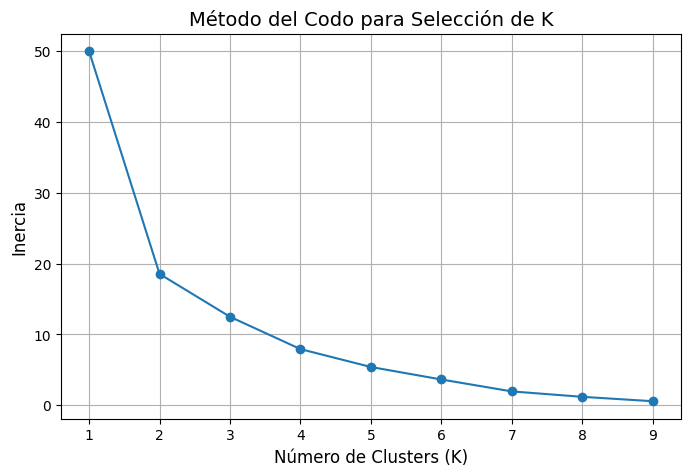

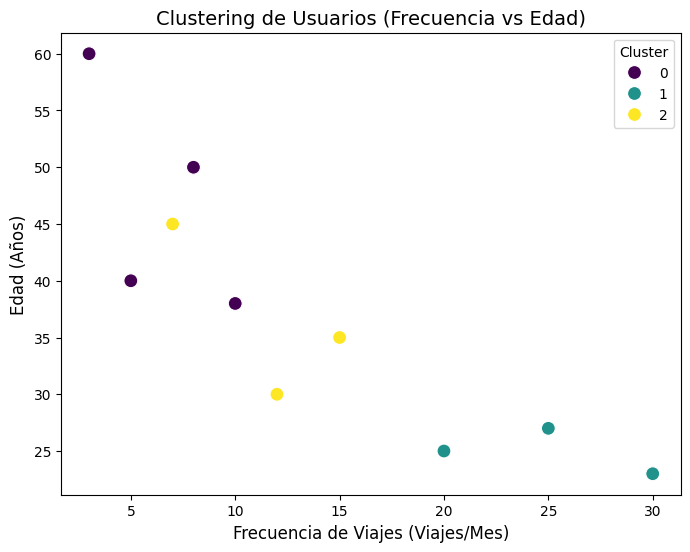

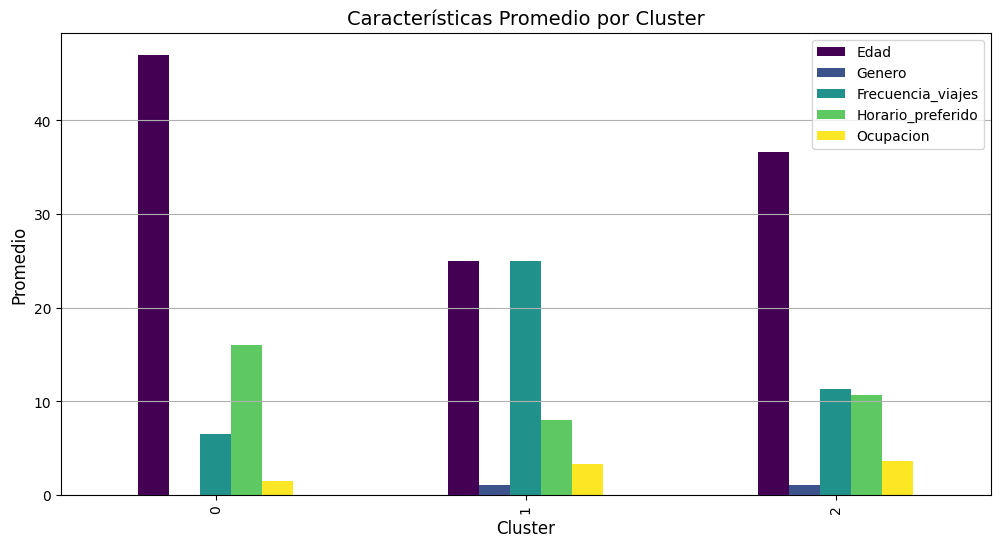

Segmentación de Usuarios y Clustering:
   Edad  Genero  Frecuencia_viajes  Horario_preferido  Ocupacion  Cluster
0    25       1                 20                  8          3        1
1    40       0                  5                 18          2        0
2    35       1                 15                  8          4        2
3    50       0                  8                 19          1        0
4    23       1                 30                  7          3        1
5    38       0                 10                  8          2        0
6    30       1                 12                 17          4        2
7    60       0                  3                 19          1        0
8    45       1                  7                  7          3        2
9    27       1                 25                  9          4        1


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Simular datos de pasajeros
data = {
    'Edad': [25, 40, 35, 50, 23, 38, 30, 60, 45, 27],
    'Genero': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],  # 1=Mujer, 0=Hombre
    'Frecuencia_viajes': [20, 5, 15, 8, 30, 10, 12, 3, 7, 25],  # Número de viajes/mes
    'Horario_preferido': [8, 18, 8, 19, 7, 8, 17, 19, 7, 9],  # Hora del día
    'Ocupacion': [3, 2, 4, 1, 3, 2, 4, 1, 3, 4]  # 1=Empleado, 2=Independiente, 3=Estudiante, 4=Otro
}
pasajeros_df = pd.DataFrame(data)

# Escalar los datos para clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pasajeros_df)

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
k_range = range(1, min(len(pasajeros_df) + 1, 10))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Selección de K', fontsize=14)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.grid()
plt.show()

# Aplicar KMeans con el número óptimo de clusters (asumimos K=3 para este ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
pasajeros_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pasajeros_df, x='Frecuencia_viajes', y='Edad', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering de Usuarios (Frecuencia vs Edad)', fontsize=14)
plt.xlabel('Frecuencia de Viajes (Viajes/Mes)', fontsize=12)
plt.ylabel('Edad (Años)', fontsize=12)
plt.legend(title='Cluster')
plt.show()

# Resumen de clusters
clusters_summary = pasajeros_df.groupby('Cluster').mean()

# Visualizar características promedio de cada cluster
clusters_summary.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Características Promedio por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
plt.grid(axis='y')
plt.show()

# Mostrar los datos enriquecidos con la asignación de clusters
print("Segmentación de Usuarios y Clustering:")
print(pasajeros_df)